In [16]:
import numpy as np
A = np.load('/pac_data/02/0/20160930_082811_796.npz')
depth_map = A[A.files[0]]
print(depth_map.shape, depth_map.dtype)


(240, 320) float16


In [15]:
import os
home_dir = os.listdir("/pac_data")
dir02 = os.listdir("/pac_data/02")
dir021 = os.listdir("/pac_data/02/1")
print(home_dir)
print(dir02)
#print(dir021)

['11', '52', '04', '06', '15', '63', '59', '.DS_Store', '08', '39', '23', '10', '72', '02', '24', '21', '22', '62']
['.DS_Store', '1', '0']
['20170123_164442_800.npz', '20170123_105228_677.npz', '20170122_085555_395.npz', '20170121_193317_541.npz', '20170118_122655_755.npz', '20170123_181649_378.npz', '20170122_102909_748.npz', '20170110_000346_283.npz', '20170109_194231_474.npz', '20170109_020140_017.npz', '20170118_121456_211.npz', '20170109_012132_362.npz', '20170108_205647_104.npz', '20170121_181901_835.npz', '20170109_104003_015.npz', '20170109_235659_564.npz', '20170109_183142_040.npz', '20170123_161914_550.npz', '20170122_073147_481.npz', '20170109_182455_753.npz', '20170118_120659_518.npz', '20170120_190316_459.npz', '20170108_134348_970.npz', '20170109_121451_829.npz', '20170109_194213_354.npz', '20170122_123608_060.npz', '20170120_205512_904.npz', '20170122_145754_320.npz', '20170121_185044_732.npz', '20170123_190933_179.npz', '20170121_035644_885.npz', '20170109_085450_186.n

In [13]:
from IPython.display import Audio
from IPython.display import display
import time


time.sleep(2)
sound_file = 'http://www.pacdv.com/sounds/interface_sound_effects/sound82.wav'
display(Audio(url=sound_file, autoplay=True))
time.sleep(2)
display(Audio(url=sound_file, autoplay=True))

for i in range(0, 3):
    time.sleep(2)
    display(Audio(url=sound_file, autoplay=True))


(240, 320, 3)


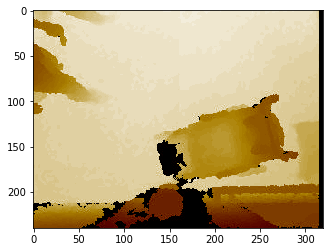

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import color

 
def depth_map_to_image(depth_map):
    img = cv2.normalize(depth_map, depth_map, 0, 1, cv2.NORM_MINMAX)
    img = np.array(img * 255, dtype=np.uint8)
    orig_img = img
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.applyColorMap(img, cv2.COLORMAP_OCEAN)
    return orig_img, img
 
def main():
    
    data = np.load('pac_data/02/0/20160930_082811_796.npz')
    depth_map = data['x'].astype(np.float32)
    orig_img, ocean = depth_map_to_image(depth_map)
    print(ocean.shape)
    plt.imshow(ocean)
    plt.show()
    '''
    plt.imshow(ocean, cmap="hot")
    plt.imshow(orig_img, cmap='gray')
    plt.set_cmap('ocean')
    plt.colorbar()
    plt.show()
    
    cv2.imshow('Image', ocean)
    print('main')
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''
    
    
    
main()